## Introduction

Our teams name is Understanding Pittsburgh and through the utilization of three different datasets we believe that we have found the best neighborhood in the City of Pittsburgh.  The approach we took was to evaluate each dataset on certian critera and rank them accordingly.  Then through the evaluation of each seperate dataset, come up with the best neighborhood in Pittsburgh.

## The Metric
The main metric that we used to definitively decide the best neighborhood in Pittsburgh was the cumulative rankings of each sub-metric.  What we did was add up the rankings across all three datasets and whichever neighborhood had the lowest total was our winner.  The datasets we used were public art structures, fire incidents, and baseball fields.  There matching metrics were the neighborhoods with the most war memorials, the most fire incidents, and the most baseball fields that had lights.  These datasets were very different from eachother and thats why they were respectivly chosen.

## The Best Neighborhood
Below we will show our data for each sub-metric and then reveal what we believe the best neighborhood in the City of Pittsburgh is.

## Public Art Data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

art_data = pd.read_csv("City_Of_Pitt._Public_Art_Data.csv") 
war_memorials = art_data[art_data['art_type'] == "War Memorials"]

war_memorials_count = war_memorials['neighborhood'].value_counts().reset_index()
war_memorials_count.columns = ['Neighborhood', 'War Memorials']

war_memorials_count_sorted = war_memorials_count.sort_values(by='War Memorials', ascending=False)
war_memorials_count_sorted = war_memorials_count_sorted.reset_index(drop=True)

war_memorials_count_sorted.index += 1
war_memorials_count_sorted.index.name = "Rank"

print(war_memorials_count_sorted)

                   Neighborhood  War Memorials
Rank                                          
1     Central Business District              5
2              Brighton Heights              4
3               Central Oakland              4
4              Allegheny Center              4
5                     Beechview              3
6           Squirrel Hill South              3
7         Spring Hill-City View              3
8              South Side Flats              3
9                   Beltzhoover              2
10                  North Shore              2
11          Lower Lawrenceville              2
12                      Carrick              1
13        Central Lawrenceville              1
14                   East Hills              1
15             Mount Washington              1
16                    Brookline              1
17                    Overbrook              1
18                East Carnegie              1
19                Regent Square              1
20           

## Fire Incidents Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fire_data = pd.read_csv("City_Of_Pitt._Fire_Incidents.csv")

filtered_data = fire_data[fire_data['neighborhood'].notna()]
incident_counts = filtered_data['neighborhood'].value_counts().reset_index()

incident_counts.columns = ['Neighborhood', 'Fire Incidents']

reversed_incident_counts = incident_counts.sort_values(by='Fire Incidents', ascending=False)

reversed_incident_counts.index += 1
reversed_incident_counts.index.name = "Rank"

print(reversed_incident_counts)

                   Neighborhood  Fire Incidents
Rank                                           
1                       Carrick             307
3     Central Business District             290
2              South Side Flats             290
4           Squirrel Hill South             269
5                     Hazelwood             257
...                         ...             ...
87                    Ridgemont              12
88                   Mt. Oliver              12
89                East Carnegie              11
90                Regent Square               9
91         Mount Oliver Borough               6

[91 rows x 2 columns]


## Baseball Fields Data

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

baseball_fields = pd.read_csv("City_Of_Pitt_Baseball_Fields.csv")

fields_with_lights_one = baseball_fields[baseball_fields['Lights'] == 1]

neighborhood_lights_counts = fields_with_lights_one['Neighborhood'].value_counts()

neighborhood_lights_counts_df = neighborhood_lights_counts.reset_index()
neighborhood_lights_counts_df.columns = ['Neighborhood', 'Fields with Lights']

neighborhood_lights_counts_df = neighborhood_lights_counts_df.sort_values(by='Fields with Lights', ascending=False)

neighborhood_lights_counts_df.insert(0, 'Rank', range(1, len(neighborhood_lights_counts_df) + 1))
neighborhood_lights_counts_df.reset_index(drop=True, inplace=True)

print(neighborhood_lights_counts_df.to_string(index=False))

 Rank             Neighborhood  Fields with Lights
    1         Mount Washington                   4
    2         Southside Slopes                   4
    3                  Carrick                   3
    4                Troy Hill                   3
    5                Brookline                   3
    6          Crafton Heights                   3
    7              Morningside                   3
    8              Beltzhoover                   2
    9                 Garfield                   2
   10           Homewood South                   2
   11    Central Lawrenceville                   2
   12               Greenfield                   2
   13                  Windgap                   2
   14      Squirrel Hill South                   2
   15                 Westwood                   2
   16                  Elliott                   2
   17        Bedford Dwellings                   2
   18              Polish Hill                   2
   19              Perry South 

## Putting It All Together

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

art_data = pd.read_csv("City_Of_Pitt._Public_Art_Data.csv")
fire_data = pd.read_csv("City_Of_Pitt._Fire_Incidents.csv")
baseball_fields = pd.read_csv("City_Of_Pitt_Baseball_Fields.csv")

war_memorials = art_data[art_data['art_type'] == "War Memorials"]
war_memorials_count = war_memorials['neighborhood'].value_counts().reset_index()
war_memorials_count.columns = ['Neighborhood', 'War Memorials']
war_memorials_count['Rank_War_Memorials'] = war_memorials_count['War Memorials'].rank(ascending=False)

filtered_data = fire_data[fire_data['neighborhood'].notna()]
incident_counts = filtered_data['neighborhood'].value_counts().reset_index()
incident_counts.columns = ['Neighborhood', 'Fire Incidents']
incident_counts['Rank_Fire_Incidents'] = incident_counts['Fire Incidents'].rank(ascending=False)

fields_with_lights_one = baseball_fields[baseball_fields['Lights'] == 1]
neighborhood_lights_counts = fields_with_lights_one['Neighborhood'].value_counts().reset_index()
neighborhood_lights_counts.columns = ['Neighborhood', 'Fields with Lights']
neighborhood_lights_counts['Rank_Fields_with_Lights'] = neighborhood_lights_counts['Fields with Lights'].rank(ascending=False)

combined_ranks = pd.merge(war_memorials_count[['Neighborhood', 'Rank_War_Memorials']], incident_counts[['Neighborhood', 'Rank_Fire_Incidents']], on='Neighborhood', how='outer')

combined_ranks = pd.merge(combined_ranks, neighborhood_lights_counts[['Neighborhood', 'Rank_Fields_with_Lights']], on='Neighborhood', how='outer')

combined_ranks.fillna(value={'Rank_War_Memorials': combined_ranks['Rank_War_Memorials'].max() + 1, 'Rank_Fire_Incidents': combined_ranks['Rank_Fire_Incidents'].max() + 1, 'Rank_Fields_with_Lights': combined_ranks['Rank_Fields_with_Lights'].max() + 1}, inplace=True)

combined_ranks['Total_Rank_Score'] = combined_ranks[['Rank_War_Memorials', 'Rank_Fire_Incidents', 'Rank_Fields_with_Lights']].sum(axis=1)

final_ranking = combined_ranks.sort_values(by='Total_Rank_Score').reset_index(drop=True)

final_ranking.index += 1
final_ranking.index.name = "Rank"

print(final_ranking)

                   Neighborhood  Rank_War_Memorials  Rank_Fire_Incidents  \
Rank                                                                       
1           Squirrel Hill South                 6.5                  4.0   
2                       Carrick                22.0                  1.0   
3              Mount Washington                22.0                  6.0   
4     Central Business District                 1.0                  2.5   
5                     Brookline                22.0                  8.0   
...                         ...                 ...                  ...   
90                East Carnegie                22.0                 89.0   
91                Regent Square                22.0                 90.0   
92       Mt. Oliver Neigborhood                23.0                 92.0   
93         Mount Oliver Borough                23.0                 91.0   
94                    Bankville                23.0                 92.0   

      Rank_

## Graph of Final Data

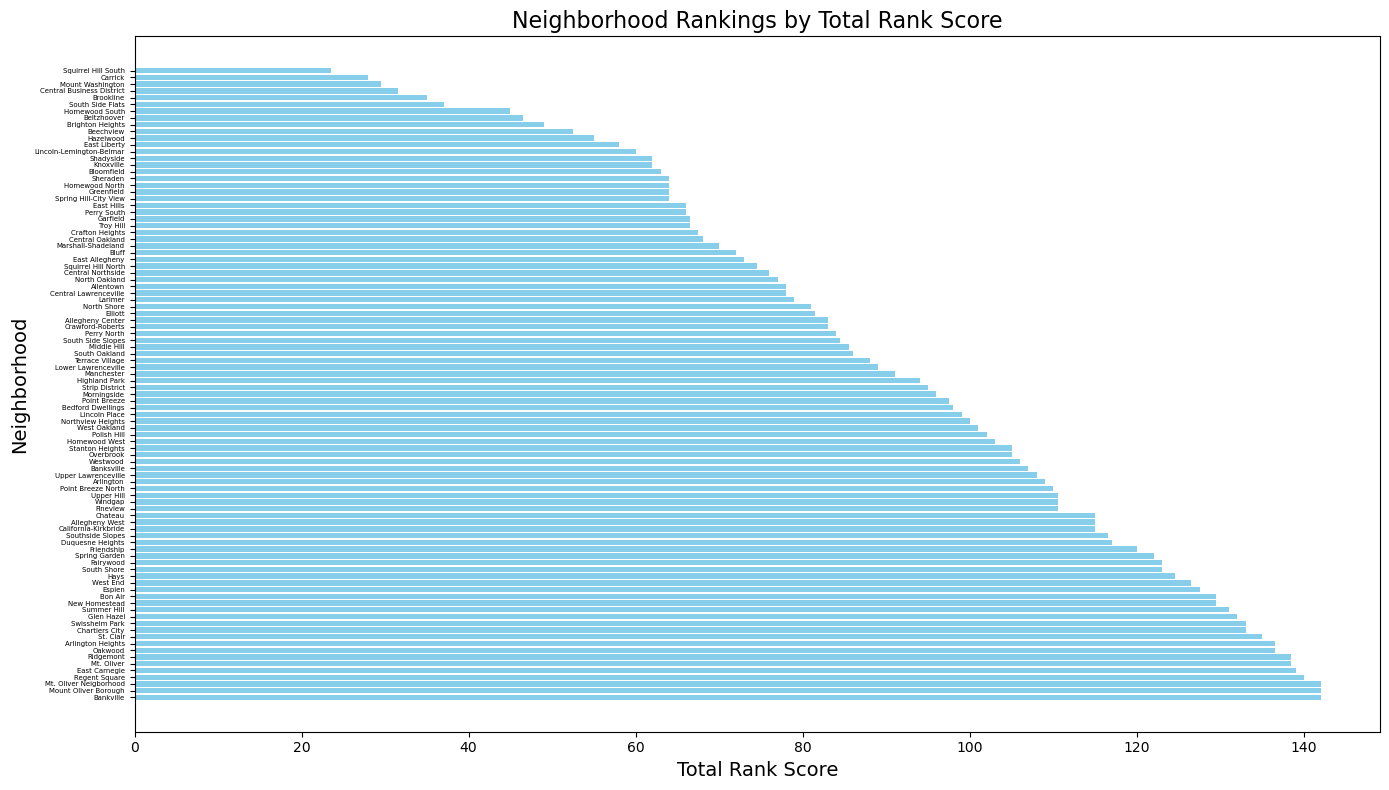

In [13]:
plt.figure(figsize=(14, 8))
plt.barh(final_ranking['Neighborhood'], final_ranking['Total_Rank_Score'], color='skyblue')
plt.gca().invert_yaxis()
plt.title('Neighborhood Rankings by Total Rank Score', fontsize=16)
plt.xlabel('Total Rank Score', fontsize=14)
plt.ylabel('Neighborhood', fontsize=14)
plt.yticks(fontsize=5)
plt.tight_layout()
plt.show()

Looking at the table and graph we can see that through the combination of all three sub-metrics rankings the best neighborhood in the City of Pittsburgh is... Squirrel Hill South!  They had the lowest overall score with a 23.5 total rank score.  Looking at the data it was the clear winner with second places' total rank score being 4.5 higher.  Bankville, Mt. Oliver Neigborhood, and Mount Oliver Borough all tied for last place with a total rank score of 142.0.  Thats over a 118 point difference between the two rankings!

## Conclusion

Matthew Caputo - The data that we discovered through the process of this project led us to the conclusion that Squirrel Hill South was the best neighborhood.  While this dosent match my personal favorite, Oakland, in the criteria we decided to measure it placed at the top most consistently.  If we changed the criteria slightly, maybe a different type of art, there is no doubt in my mind that we could have gotten a different 'best' neighborhood.  Overall though I enjoyed working on this project and learning more about the City of Pittsburgh even if it was in some obscure categories.

Joey Vojtas - Our data shows that Squirrel Hill is the best overall neighborhood. Comparing it to my favorite neighborhood - Wexford - it has a similar fire incident rate, meaning it's a safe place to live in. It was cool to see how all the neighborhoods were alike and not alike. In conclusion this was a fun project to work on and am exctied to continue learning about similiar things.